In [ ]:
"""
We'll perform analysis using the data, by studying the factors such as:

• Location and types of the restaurant
• Approx Price of food
• The needs of people who are striving to get the best cuisine in the city
• Services provided by them
• Reviews and Ratings
"""

"\nWe'll perform analysis using the data, by studying the factors such as:\n\n• Location and types of the restaurant\n• Approx Price of food\n• The needs of people who are striving to get the best cuisine in the city\n• Services provided by them\n• Reviews and Ratings\n"

In [ ]:
#!unzip /content/153420_352891_compressed_zomato.csv.zip

import numpy as np
import pandas as pd

df = pd.read_csv("/content/zomato.csv")
df.head()


In [ ]:

#import os #works with os related functions like getdir,open,close on os files and folders and much more
import requests #for working with server to pull data
import json #for working with key value pair here
#import sys #enables os functions
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = "https://developers.zomato.com/api/v2.1/"
apikey = "c3c70a281939e72f0e1138e5f41a8ab9"
headers = {'Accept': 'application/json','user-key': apikey,}  #additional information to access url

#To get entity id and type 
def get_location_details(query):
  params = {'query' : query} #to get customised search url according to user input 
  response = json.loads(requests.get(url + "locations?",headers=headers,params=params).content.decode("utf-8"))
  for i in response['location_suggestions'] :
    country_name = i['country_name'] 
    if country_name in ("Ireland","India") :
       latitude,longitude,loc_id,loc_type = i['latitude'],i['longitude'],i['entity_id'],i['entity_type']
       return latitude,longitude,loc_id,loc_type
    else :
      return None

#To get cuisine 
def get_cuisines(lat,long):
  #to get customised search url according to user input
  params = {'lat' : lat,'lon': long}  
  response = json.loads(requests.get('https://developers.zomato.com/api/v2.1/cuisines?',headers=headers,params=params).content.decode("utf-8"))
  cuisine_list = []
  for s in response['cuisines']:
    cus = s['cuisine']
    cuisine_id,cuisine_name = cus['cuisine_id'],cus['cuisine_name']
    #cuisine = str(cuisine_id) + ":" + cuisine_name
    # cuisine_list.append("%s - %s" %(cuisine_id, cuisine_name))
    cuisine_list.append((cuisine_name, cuisine_id))
  return cuisine_list

#To get restaurant id and sorted top restaurants on cost/rating
def get_restaurants(entity_id, entity_type,num,sort,orderby):
    params = {'entity_id': entity_id,'entity_type': entity_type, 'cuisines' : num , 'sort' : sort ,'order' : orderby}
    #converts json to python dictionary than string for easy access
    response = json.loads(requests.get('https://developers.zomato.com/api/v2.1/search',headers=headers, params=params).content.decode("utf-8"))
    return response

def get_reviews(restid,start,count):
    params = {'res_id': restid,'start' : start,'count' :count}
    reviews = []
    response = json.loads(requests.get('https://developers.zomato.com/api/v2.1/reviews?',headers=headers, params=params).content.decode("utf-8"))
    for r in  response['user_reviews']:
      reviews.append([r['review']['review_text']])
    return reviews

if __name__ ==  "__main__" :
    
    print('Search Location in India/Ireland : ')
    place = input() #reads input from an input device from user.
    lati,longi,entity_id, entity_type = get_location_details(place)
    print()
    cuisine_name_list = []
    cuisine_name_list= get_cuisines(lati,longi)
    review_list=[]
    id=[]
    name=[]
    resttype=[]
    cuisines=[]
    cost=[]
    address=[]
    location=[]
    city=[]
    online=[]
    table=[]
    rating=[]
    votes=[]

    @widgets.interact(cuisine=cuisine_name_list) #passed as an arguement to the function immediately below it 
    def f(cuisine=cuisine_name_list[0]):
        sortby = 'rating' 
        order = 'desc' 
        data = get_restaurants(entity_id, entity_type,cuisine,sortby,order)
        print("Restaurants in " + place.title() + " --\n")
        for restaurant in data['restaurants']:
            r = restaurant['restaurant']
            identity=r['id']
            loc = r['location'] 
            id.append(r['id'])
            name.append(r['name'].upper())
            resttype.append(r['establishment'])
            cuisines.append(r['cuisines'])
            cost.append(str(r['average_cost_for_two']))
            address.append(loc['address'])
            location.append(loc['locality_verbose'])
            city.append(loc['city'])
            online.append(r['has_online_delivery'])
            table.append(r['has_table_booking'])
            rating.append(r['user_rating']['aggregate_rating'])
            votes.append(r['user_rating']['votes'])
            data2 = get_reviews(identity,10,20)
            for i in data2:
              review_list.append(i)
        with open('id.txt', 'w') as file_handler1:
          for item in id:
            file_handler1.write('{}\n'.format(item))
        with open('name.txt', 'w') as file_handler1:
          for item in name:
            file_handler1.write('{}\n'.format(item))
        with open('type.txt', 'w') as file_handler1:
          for item in resttype:
            file_handler1.write('{}\n'.format(item))
        with open('cuisines.txt', 'w') as file_handler1:
          for item in cuisines:
            file_handler1.write('{}\n'.format(item))
        with open('cost.txt', 'w') as file_handler1:
          for item in cost:
            file_handler1.write('{}\n'.format(item))
        with open('address.txt', 'w') as file_handler1:
          for item in address:
            file_handler1.write('{}\n'.format(item))
        with open('location.txt', 'w') as file_handler1:
          for item in location:
            file_handler1.write('{}\n'.format(item))
        with open('city.txt', 'w') as file_handler1:
          for item in city:
            file_handler1.write('{}\n'.format(item))
        with open('online.txt', 'w') as file_handler1:
          for item in online:
            file_handler1.write('{}\n'.format(item))
        with open('table.txt', 'w') as file_handler1:
          for item in table:
            file_handler1.write('{}\n'.format(item))
        with open('rating.txt', 'w') as file_handler1:
          for item in rating:
            file_handler1.write('{}\n'.format(item))  
        with open('votes.txt', 'w') as file_handler1:
          for item in votes:
            file_handler1.write('{}\n'.format(item))      
        with open('reviewslstm.txt', 'w') as file_handler:
          for item in review_list:
            file_handler.write('{}\n'.format(item))
        return


In [ ]:

with open('id.txt', 'r') as file:
   id = file.read().splitlines()
with open('name.txt', 'r') as file:
   name = file.read().splitlines()
with open('type.txt', 'r') as file:
   types = file.read().splitlines()
with open('cuisines.txt', 'r') as file:
   cuisines = file.read().splitlines()
with open('cost.txt', 'r') as file:
   cost = file.read().splitlines()
with open('address.txt', 'r') as file:
   address = file.read().splitlines()
with open('location.txt', 'r') as file:
   location = file.read().splitlines()
with open('city.txt', 'r') as file:
   city = file.read().splitlines()
with open('online.txt', 'r') as file:
   online = file.read().splitlines()
with open('table.txt', 'r') as file:
   table = file.read().splitlines()
with open('rating.txt', 'r') as file:
   rating = file.read().splitlines()
with open('votes.txt', 'r') as file:
   votes = file.read().splitlines()

import pandas as pd

dict = {'id':id,
'name':name,
'types':types,
'cuisines':cuisines,
'cost':cost,
'address':address,
'location':location,
'city':city,
'online':online,
'table':table,
'rating':rating,
'votes':votes}  

#id,name,resttype,cuisines,average_cost_for_two,address,location,city,has_online_delivery,has_table_booking,rating,votes

df = pd.DataFrame(dict) 



,id,name,types,cuisines,cost,address,location,city,online,table,rating,votes
0,18650352,SOY SOI,['Casual Dining'],"Burmese, Thai, Vietnamese, Indonesian, Singapo...",1400,"2/10, Gandhi Mandapam Road, Kotturpuram, Chennai","Kotturpuram, Chennai",Chennai,1,0,4.5,1360
1,18429797,FLOWER DRUM,['Casual Dining'],"Chinese, Thai",800,"2/1, 4th Floor, Near Adyar Signal Junction, Ad...","Adyar, Chennai",Chennai,1,1,4.4,1460
2,18998318,MOMO KE BAAP,['Quick Bites'],"Momos, North Indian, Burger",350,"Shop 25, Corporation Shopping Complex, Indira ...","Adyar, Chennai",Chennai,0,0,4.4,54
3,68502,LITTLE ITALY,['Casual Dining'],"Italian, Mexican, Salad",1500,"E-50, 17th Cross Street, Near Spencers Daily, ...","Besant Nagar, Chennai",Chennai,1,1,4.4,2806
4,65123,CREAM CENTRE,['Casual Dining'],"North Indian, Italian, Fast Food, Chinese, Str...",1600,"55, 2nd Main Road, Near Kaliappa Hospital, RA ...","RA Puram, Chennai",Chennai,1,0,4.4,3008
5,69024,OSTERIA BY THAT MADRAS PLACE,['Café'],"Cafe, Italian, European",800,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...","Adyar, Chennai",Chennai,1,0,4.3,3848
6,18512380,BURGERMAN,['Quick Bites'],"Burger, Fast Food, Beverages",450,"31, 4th Main Road, Besant Nagar, Chennai","Besant Nagar, Chennai",Chennai,1,0,4.3,2480
7,18665421,BLIND CH3MISTRY,['Café'],"Cafe, Continental, Italian, Desserts, Beverages",700,"7/2 M, 4th Main Road, Besant Nagar, Chennai","Besant Nagar, Chennai",Chennai,1,0,4.3,2169
8,73275,SUPERSTAR PIZZA,['Casual Dining'],"Pizza, Italian, Fast Food, Beverages",750,"20, 5th Avenue, Besant Nagar Beach, Besant Nag...","Besant Nagar, Chennai",Chennai,1,1,4.3,1312
9,18543762,CHAI GALLI,['Café'],"Cafe, Tea, Italian, Beverages, Desserts",600,"15/4, 1st Floor, 4th Main Road, Besant Nagar, ...","Besant Nagar, Chennai",Chennai,1,0,4.3,1059


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Buffet: 1297
Cafes: 626
Delivery: 465
Desserts: 393
Dine-out: 591
Drinks & nightlife: 1437
Pubs and bars: 1318


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


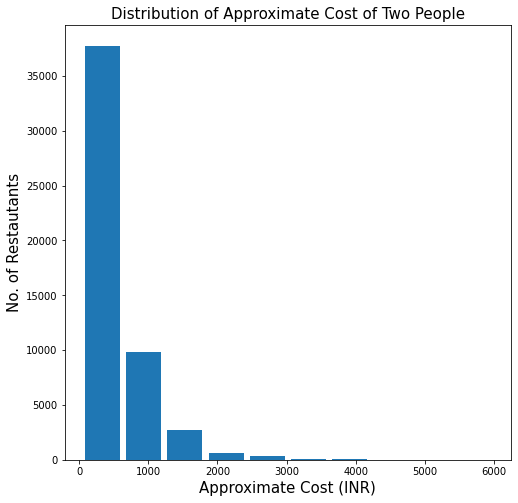

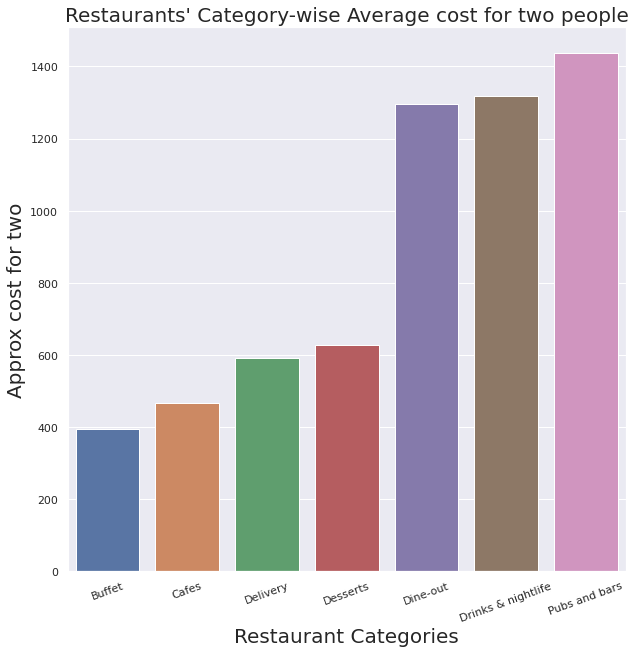

In [ ]:
df = df.drop(columns=['url', 'phone', 'menu_item'])
df.head()

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)
df['approx_cost(for two people)'].dtype

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title(label='Distribution of Approximate Cost of Two People', fontsize=15)
plt.ylabel('No. of Restautants', fontsize=15)
plt.xlabel('Approximate Cost (INR)', fontsize=15)

plt.hist(df['approx_cost(for two people)'], rwidth= 0.85)
#The Distribution of the 'Approximate Cost' parameter is right-skewed. The distribution shows most of the restaurants offer food at rates upto 1000 INR for 2 people.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['book_table'] = le.fit_transform(df['book_table'])

df['online_order'] = le.fit_transform(df['online_order'])
df.head()

#Location wise restaurants which have both online order and table booking available..
#we'll calculate mean of the approx cost for 2.
#first converting the column values from str to float..

#In which area, there are highest number of restaurants? Location wise restaurants density..
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['approx_cost(for two people)'] = imp.fit_transform(df[['approx_cost(for two people)']]).ravel()

df['approx_cost(for two people)'].describe()

category_costs = dict()
iter = 0

for cost in df['approx_cost(for two people)']:
    if df['listed_in(type)'][iter] not in category_costs.keys():
        category_costs[df['listed_in(type)'][iter]] = cost
    else:
        category_costs[df['listed_in(type)'][iter]] += cost
    iter+=1;

#Calculating averages of all
for key, value in category_costs.items():
    category_costs[key] = int(category_costs[key] / df['listed_in(type)'].value_counts()[key])
    

for key, value in category_costs.items():
    print(f'{key}: {value}')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#How much is the average approx cost for two overall in bangalore?
#Location wise approx cost for 2.

rest_cats = category_costs.keys()
rest_cost = category_costs.values()

rest_cats = list(rest_cats)
rest_cost = list(rest_cost)

plt.figure(figsize=(10,10))
plt.xticks(rotation = 20)

sns.barplot(x=sorted(rest_cats), y=sorted(rest_cost))

plt.title(label='Restaurants\' Category-wise Average cost for two people', fontsize=20)
plt.xlabel('Restaurant Categories', fontsize=20)
plt.ylabel('Approx cost for two', fontsize=20)

plt.show()


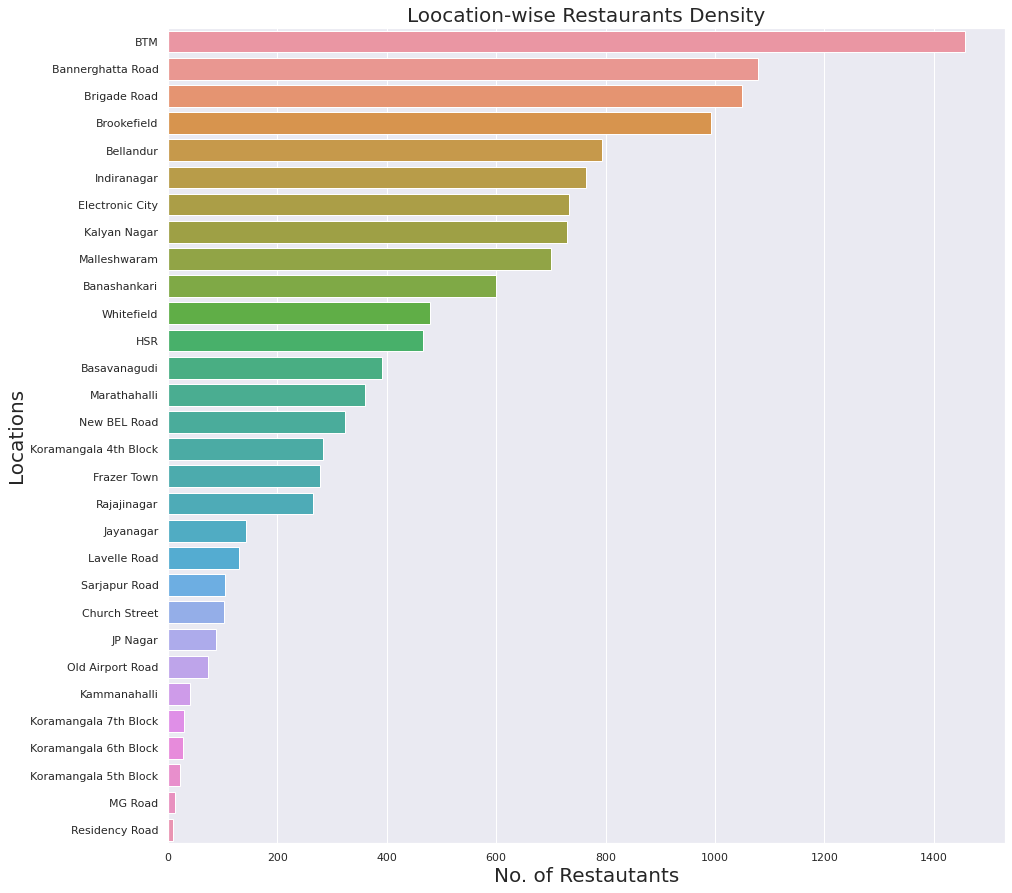

In [ ]:
rests_density_df = df.drop_duplicates(subset=("name", "address", "location"))

rests_density_df.shape

#location wise restaurant density

location_wise_counts = rests_density_df['listed_in(city)'].value_counts()

plt.figure(figsize=(15,15))

sns.barplot(x=list(location_wise_counts.values), y=list(location_wise_counts.keys()))

plt.title(label='Loocation-wise Restaurants Density', fontsize=20)
plt.xlabel('No. of Restautants', fontsize=20)
plt.ylabel('Locations', fontsize=20)

plt.show()

#The client can now get a brief idea about where can they think of opening new restaurant. They may come to the conclusion by knowing some more information further.


In [ ]:
book_table_count = dict()
online_order_count = dict()
table_online_count = dict()
table_online_none_count = dict()

for loc in location_wise_counts.keys():
    book_table_count[loc] = rests_density_df[(rests_density_df['book_table'] == True) & (rests_density_df['online_order'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    online_order_count[loc] = rests_density_df[(rests_density_df['online_order'] == True) & (rests_density_df['book_table'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    table_online_count[loc] = rests_density_df[(rests_density_df['book_table'] == True) & (rests_density_df['online_order'] == True) & (rests_density_df['listed_in(city)'] == loc)].shape[0]
    table_online_none_count[loc] = rests_density_df[(rests_density_df['book_table'] == False) & (rests_density_df['online_order'] == False) & (rests_density_df['listed_in(city)'] == loc)].shape[0]

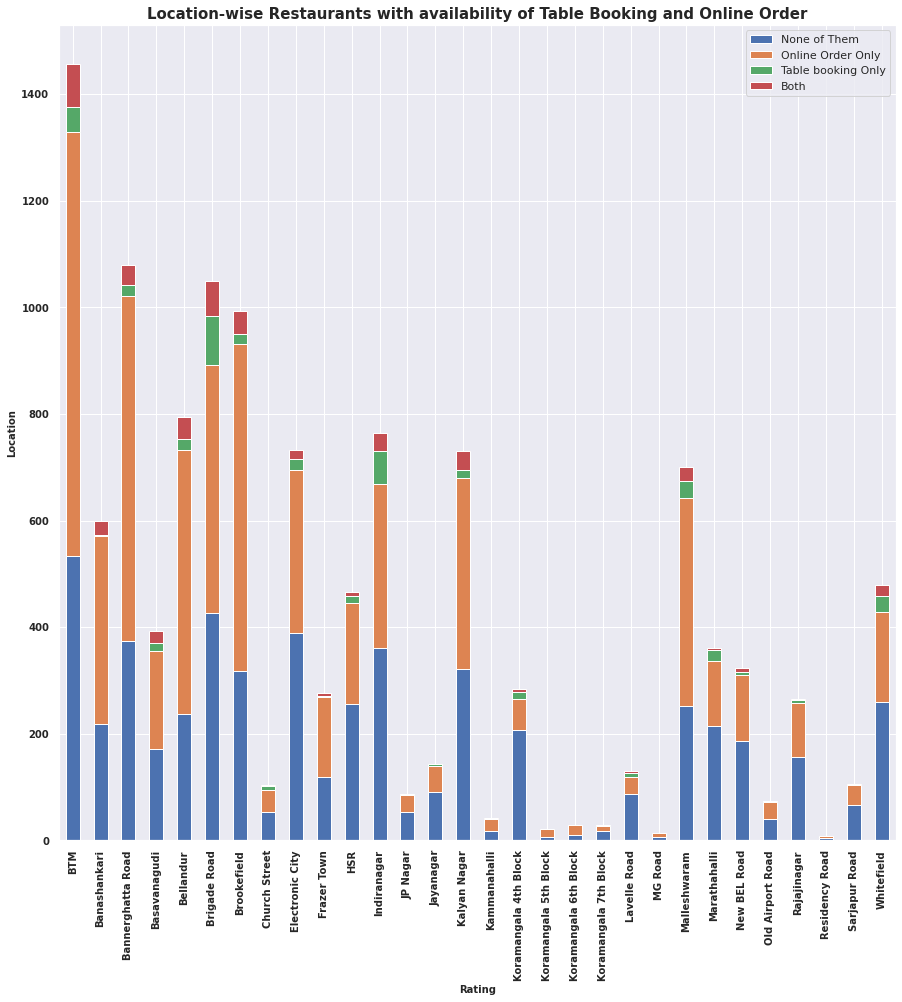

In [ ]:
rests_density_df['listed_in(city)'].value_counts()
bars1 = list(book_table_count.values())
bars2 = list(online_order_count.values())
bars3 = list(table_online_count.values())
bars4 = list(table_online_none_count.values())

r = list(np.arange(0, 30))
bars = np.add(bars1, bars2).tolist()
bars = np.add(bars, bars3).tolist()

names = list(location_wise_counts.keys())
barWidth = 1

#Some more information can be explored regarding the restaurnts like the availability of online order and table booking...

#Here we can provide some more insight on the restaurants. On a particular location, how many restaurants have the Table booking, online order, both facilities, and none of those facilities available.

loc_plt=pd.crosstab(rests_density_df['listed_in(city)'],[rests_density_df['book_table'], rests_density_df['online_order']])
loc_plt.plot(kind='bar',stacked=True, figsize=(15,15));
plt.title('Location-wise Restaurants with availability of Table Booking and Online Order',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
legends = ['None of Them', 'Online Order Only', 'Table booking Only', 'Both']
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend(legends)
plt.show()


#We see that plenty of the restaurants provide Online ordering facility. While table booking is available at handful of restaurants.Most of them do not provide any of these facilities.

In [ ]:
#!pip install geocoder
import geocoder

addr_count = 0

geocodes_list = []
address_list = rests_density_df['address'].iloc[:50]

for address in address_list:
    g = geocoder.tomtom(address, key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
#    print('before try')
    if 'ERROR - 404' in str(g):
#        print('under Error')
        location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
        g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
        geocodes_list.append(g.json['raw']['position'])
    else:
        try:
 #           print('in try')
            geocodes_list.append(g.json['raw']['position'])
        except TypeError:
    #        print('in type error')
            #Get the location based on the address
            location_of_address = rests_density_df.loc[rests_density_df['address'] == address]['listed_in(city)']
            g = geocoder.tomtom(location_of_address.iloc[0], key='1jlaxMGkWEN9RfiSOp7seGKQb6VqldL7')
            geocodes_list.append(g.json['raw']['position'])
#    addr_count += 1
#    print(addr_count)

df_codes = pd.DataFrame(geocodes_list)

df_codes.to_csv('/content/geocodes.csv', index=False)

#Next Time: first reading the existing codes from file and appending new codes to write them back to file.
import geocoder
from time import sleep


     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
#displaying the markers on map using folium

#!pip install folium
import folium
from IPython.display import display
  
my_map3 = folium.Map(location = [12.9724, 77.5806])
  
# Pass a string in popup parameter 
folium.Marker(list(df_codes.iloc[1]), popup = 'Siruseri').add_to(my_map3) 
  
  
my_map3.save(" my_map3.html ") 

display(my_map3)

In [ ]:
# Color code for restaurants markers on map based on type of restaurant
#!pip install -U selenium
colors = {'Buffet':'red', 'Cafes':'blue', 'Delivery':'gray', 
          'Desserts':'green', 'Dine-out':'purple', 'Drinks & nightlife':'pink', 
          'Pubs and bars':'black'}

import folium
from IPython.display import display

df_codes= pd.read_csv('/content/geocodes.csv', index_col=False)

#Getting the Bangalore Map
Bangalore_map = folium.Map(location = [12.9724, 77.5806], zoom_start = 11, png_enabled=True, prefer_canvas=True, tiles='OpenStreetMap')

#getting the codes in the form of list
codes = []
codes = df_codes.values.tolist()
codes = codes[:2000]
# passing geo codes and the restaurant name one by one on the map
for code, rest_type, rest_tag in zip(codes, rests_density_df['listed_in(type)'], rests_density_df['name']):
#    rest_type = rests_density_df.loc[rests_density_df['name'] == rest_tag]['listed_in(type)'][0]
    folium.Marker(code, popup = rest_tag, icon= folium.Icon(color=colors[rest_type])).add_to(Bangalore_map)

#Display the map

display(Bangalore_map)

Bangalore_map.save("/content/Bangalore_map.html")

#people , business with the restaurant density
#map zoom


In [ ]:
#Heatmap using Folium¶

from folium import plugins
from folium.plugins import HeatMap

heatmap_Bangalore = folium.Map(location=[12.9724, 77.5806], zoom_start = 11) 

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in df_codes.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heatmap_Bangalore)

# Display the map
heatmap_Bangalore


In [ ]:
heatmap_df = df[['online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)']]

heatmap_df.dropna(subset=['rate'], inplace=True)
#Converting rate feature type from string to float. Also cutting out '/5' part from it.
def convert_rates(str_rate):
    str_rate =float(str_rate[:3])
    return str_rate

heatmap_df = heatmap_df[~heatmap_df.rate.str.contains("NEW", na=False)]
heatmap_df = heatmap_df[~heatmap_df.rate.str.contains("-", na=False)]

heatmap_df['rate'] = heatmap_df['rate'].apply(convert_rates)

heatmap_df.head()

import seaborn as sns

corr_matrix = heatmap_df.corr()
ax = sns.heatmap(corr_matrix, annot=True)

#We observe that there is a high positive correlation between Booking Table and Approximate Cost for two.It implies that the cost is higher where Table booking facility is provided.

In [ ]:
#Most liked Dishes

wordcloud_df = df.copy()
wordcloud_df.dropna(subset=['dish_liked'], inplace=True)

wordcloud_df['dish_liked'].isna().sum()
wordcloud_df['dish_liked'].describe()
wordcloud_df.tail()

In [ ]:
"""
with open('reviewslstm.txt', 'r') as file:
   reviews = file.read().splitlines()

#!pip install spoonacular
import spoonacular as sp

api = sp.API("991175ce5ebe4325be72802427d4f113")

dish_liked=[]

# Detect text for mentions of food
for i in reviews :
  response = api.detect_food_in_text(i)
  data = response.json()  
  dish_liked.append(data['annotations'])
  """

In [ ]:
from wordcloud import WordCloud
from matplotlib import rcParams
import matplotlib.pyplot as plt

#all_articles = ' '.join(df_articles['stops_removed'].str.lower())

all_dishes_liked = str()
for each_entry in wordcloud_df['dish_liked']:
    all_dishes_liked = all_dishes_liked + each_entry + ' '



wordcloud = WordCloud(background_color="white", max_words=500).generate(all_dishes_liked)

rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Seems like Biryanis, Butter Chicken, Dosa, Ice Cream are some of the popular dishes among Bangaloreans.


In [ ]:
#Let's See what Cuisines are popular in Bangalore.
##North Indian Cuisines are the most popular here. Not to forget about the South Indian and Chinese food though.

all_cuisines = str()
for each_entry in wordcloud_df['cuisines']:
    all_cuisines = all_cuisines + each_entry + ' '


wordcloud = WordCloud(background_color="white", max_words=500).generate(all_cuisines)

rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#give food based cloud.


In [ ]:
#Analysing the Reviews

import re

all_reviews_ratings_list = []
for name, each_review_list in zip(rests_density_df['name'], rests_density_df['reviews_list']):
    reviews_list_evaluated = eval(each_review_list)
    for rating, raw_review in reviews_list_evaluated:
        if rating:
            rating_score = rating.strip("Rated").strip()
            rating_score = float(rating_score)
            review_doc = raw_review.strip("RATED").strip()
            all_reviews_ratings_list.append([name, rating_score, review_doc])



In [ ]:
# creating Dataframe from the above list of reviews and ratings

reviews_ratings_df = pd.DataFrame(all_reviews_ratings_list, columns=['Name', 'Rating', 'Review'])

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]'," ",x))

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : re.sub("\n"," ",x))

reviews_ratings_df['Review'] = reviews_ratings_df['Review'].apply(lambda x : x.lower())
reviews_ratings_df.head()

,Name,Rating,Review
0,Jalsa,4.0,a beautiful place to dine in the interiors tak...
1,Jalsa,4.0,i was here for dinner with my family on a week...
2,Jalsa,2.0,its a restaurant near to banashankari bda me ...
3,Jalsa,4.0,we went here on a weekend and one of us had th...
4,Jalsa,5.0,the best thing about the place is it ...


In [ ]:
#Top keywords from Reviews - We can get even more insights by showing n-grams out of reviews.

all_reviews_combined = reviews_ratings_df['Review'].str.cat().strip()

from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice

def generate_ngrams(text, n_range):
    word_frequencies = dict()
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(n_range, n_range))
    cv_fit = vectorizer.fit_transform(text)
    words_freq = np.asarray(cv_fit.sum(axis=0))

    for word, index in vectorizer.vocabulary_.items():
        word_frequencies[word] = words_freq[0, index]
    
    return word_frequencies

all_reviews_combined = [all_reviews_combined]
word_frequencies = generate_ngrams(all_reviews_combined, 1)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_unigrams = dict(islice(sorted_word_frequencies.items(), 50))

word_frequencies = generate_ngrams(all_reviews_combined, 2)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_bigrams = dict(islice(sorted_word_frequencies.items(), 50))

word_frequencies = generate_ngrams(all_reviews_combined, 3)
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[1], reverse = True))
most_common_trigrams = dict(islice(sorted_word_frequencies.items(), 50))

strings_unigrams, count_unigrams = zip(*most_common_unigrams.items())
strings_unigrams = list(strings_unigrams)

strings_bigrams, count_bigrams = zip(*most_common_bigrams.items())
strings_bigrams = list(strings_bigrams)

strings_trigrams, count_trigrams = zip(*most_common_trigrams.items())
strings_trigrams = list(strings_trigrams)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#function to plot the ngrams
def plot_ngrams(x, y, n_range):
    plt.figure(1, figsize=(12, 12))
    if n_range == 1:
        title = "Top Unigrams"
        y_label = "Unigrams"
    elif n_range == 2:
        title = "Top Bigrams"
        y_label = "Bigrams"
    elif n_range == 3:
        title = "Top Trigrams"
        y_label = "Trigrams"
    else:
        return

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(y_label)
    sns.barplot(x=y, y=x, palette='dark')
    plt.show()
    return

In [ ]:
# words vs frequencies 
plot_ngrams(strings_unigrams, count_unigrams, 1)
plot_ngrams(strings_bigrams, count_bigrams, 1)
plot_ngrams(strings_trigrams, count_trigrams, 1)


In [ ]:
#Sentiment analysis using Keras LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding

max_review_length = 128

tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(reviews_ratings_df['Review'].values)
X = tokenizer.texts_to_sequences(reviews_ratings_df['Review'].values)

vocab_size = len(tokenizer.word_index) + 1     
X = pad_sequences(X, maxlen = max_review_length)

In [ ]:
embed_dim = 32

model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = max_review_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
reviews_ratings_df['labels']=reviews_ratings_df['Rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

Y = reviews_ratings_df['labels']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
X_train.shape

In [ ]:
batch_size = 3200

es = EarlyStopping(monitor='val_loss', mode='min')
mc = ModelCheckpoint('/content/sent_anls_model.h5', monitor='val_loss', mode='min', save_best_only=True) 
#X is word vector to be given as input for lstm
model.fit(X_train, Y_train, epochs = 5, validation_split=0.2, batch_size=batch_size, use_multiprocessing=True, verbose = 1, callbacks=[es, mc])

In [ ]:
model = load_model('/content/sent_anls_model.h5')
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#predictions in test set
y_pred = model.predict_classes(X_test, verbose=1)

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')

#vader why it is important?

"""
To summarize from the data:
Overall there are positive reviews in majority of the restaurants in Bengaluru. Reviews also indicate that the bangaloreans are concerned about the food quality and many other things such as Ambience, overall experience, service etc. A few negative reviews also indicate that Bangaloreans are pretty much critical when it comes to go out in the restaurants to hang out.

About the Business Problem:
We can choose to take various decisions with our restaurant owner client on possible areas such as type of restaurant, serivices provided. We can take conclusive decisions based on the restaurant owner's budget to start a new restaurant and other preferences.

Although this data does not include several other aspects for the business problem, we've got plenty of insights for our client which will be definitely useful for when they want to open a new restaurant in Bangalore.
"""